In [169]:
#load the necessary modules
import pandas as pd
import numpy as np
import datetime, math
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor
from sklearn import svm, preprocessing
from sklearn.metrics import accuracy_score

In [170]:
# loaded the csv file
df_train = pd.read_csv("../ten-datasets/pointcloudmnist2d/train.csv")
df_test = pd.read_csv("../ten-datasets/pointcloudmnist2d/test.csv")
df_train.head()

,label,x0,y0,v0,x1,y1,v1,x2,y2,v2,...,v347,x348,y348,v348,x349,y349,v349,x350,y350,v350
0,5,17,10,249,16,6,81,13,14,241,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,0,22,17,50,8,8,225,22,15,195,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,4,8,12,207,10,11,98,19,20,2,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,1,8,6,48,11,8,251,14,13,251,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,9,17,15,253,16,4,56,9,14,176,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [171]:
df_test.head()

,label,x0,y0,v0,x1,y1,v1,x2,y2,v2,...,v347,x348,y348,v348,x349,y349,v349,x350,y350,v350
0,7,14,7,254,21,18,140,21,17,106,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,2,17,6,253,16,19,253,10,7,253,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1,16,18,223,10,4,5,15,13,165,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,0,17,8,253,20,17,105,14,20,251,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,4,18,17,18,10,11,85,17,4,236,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [172]:
X_train = np.array(df_train.loc[:, 'x0':'v350'])
y_train = np.array(df_train['label'])
X_train.shape

(60000, 1053)

In [173]:
X_test = np.array(df_test.loc[:, 'x0':'v350'])
y_test = np.array(df_test['label'])
X_test.shape

(10000, 1053)

In [174]:
y_train = y_train.reshape(-1, 1)
y_train.shape

(60000, 1)

In [175]:
y_test = y_test.reshape(-1, 1)
y_test.shape

(10000, 1)

D:\Programs\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


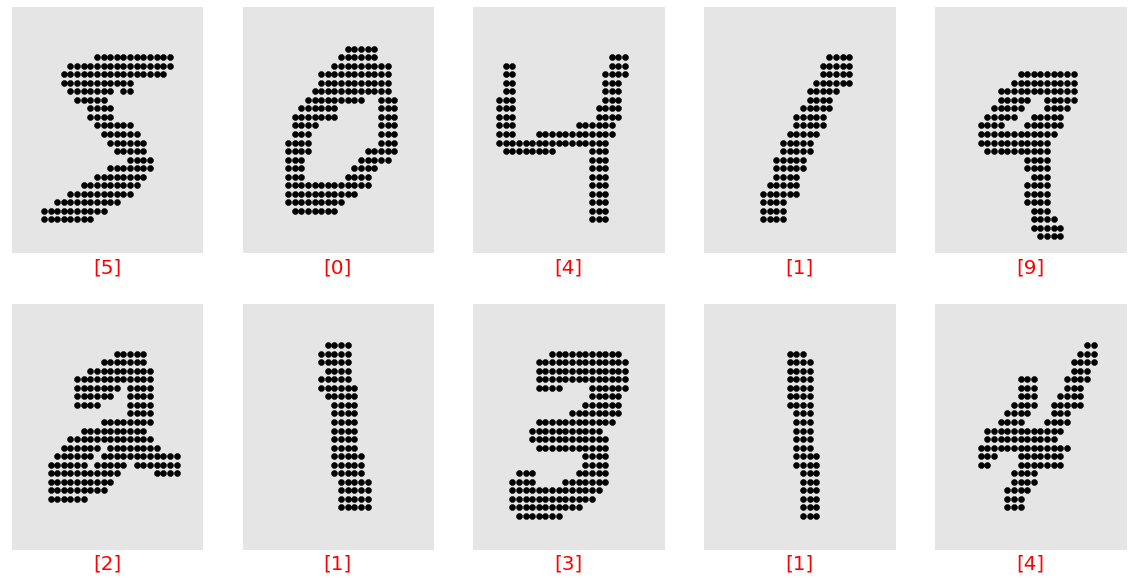

In [176]:
#visualize the first 10 training images 
i, x, y = 0, 0, 0

plt.figure(figsize=(20,10))
for num_fig in range(10):
    plt.subplot(2, 5, num_fig+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlim(-1, 28)
    plt.ylim(-1, 28)
    plt.xlabel(y_train[num_fig], size=20, color='red')
    i = 0
    for val in X_train[num_fig]:
        if val != -1:
            if i % 3 == 0:
                x = val
            if i % 3 == 1:
                y = val
            if i % 3 == 2:
                plt.scatter(x, y, color='black')
                #print(i)
        #print(val)
       
        i += 1



In [177]:
def restore_image_array(X_array, resolution):
    num_samples = len(X_array)
    #print(num_samples)
    X_img = np.zeros((num_samples, resolution, resolution))
    
    x, y, pixel = 0, 0, 0
    
    for seq in range(num_samples):
        i = 0
        for val in X_array[seq]:
            if val != -1:
                if i % 3 == 0:
                    x = val
                if i % 3 == 1:
                    y = val
                if i % 3 == 2:
                    pixel = val
                    X_img[seq][27-y][x] = pixel
                 
            i += 1
    
    return X_img
    

In [178]:
X_img_train = restore_image_array(X_train, 28)
X_img_train.shape

(60000, 28, 28)

In [179]:
X_img_test = restore_image_array(X_test, 28)
X_img_test.shape

(10000, 28, 28)

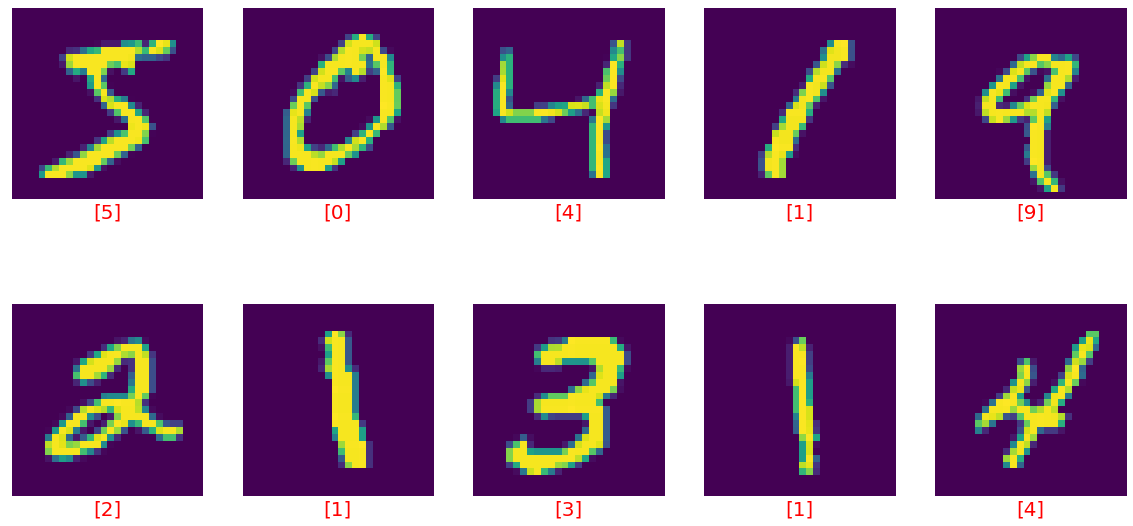

In [180]:
#visualize the first 10 image from the new 
plt.figure(figsize=(20,10))
for num_fig in range(10):
    plt.subplot(2, 5, num_fig+1)
    plt.imshow(X_img_train[num_fig])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(y_train[num_fig], size=20, color='red')


# Shallow Learning

# KNN regression

In [181]:
X_img_train.shape

(60000, 28, 28)

In [182]:
# reduce the dim of the array
X_flatten_train = X_img_train.reshape(len(X_img_train), -1)
X_flatten_train.shape

(60000, 784)

In [183]:
X_flatten_test = X_img_test.reshape(len(X_img_test), -1)
X_flatten_test.shape

(10000, 784)

In [129]:
clf = KNeighborsRegressor()
clf.fit(X_flatten_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [130]:
cof = clf.score(X_flatten_test, y_test)
print('coefficient of determination: %.4f' %(cof))
#accuracy

coefficient of determination: 0.9467


# Extra trees

In [184]:
clf = ExtraTreesRegressor(n_estimators=10, max_features=32, random_state=0)
clf.fit(X_flatten_train, y_train)

D:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features=32, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=10, n_jobs=None, oob_score=False,
                    random_state=0, verbose=0, warm_start=False)

In [185]:
cof = clf.score(X_flatten_test, y_test)
print('coefficient of determination: ',cof)

coefficient of determination:  0.8881029196258161


# Random Forest

In [152]:

clf = RandomForestClassifier(criterion='gini', n_estimators=10)
clf.fit(X_flatten_train, y_train)


D:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [153]:
cof = clf.score(X_flatten_test, y_test)
print('coefficient of determination: %.4f' %(cof))

coefficient of determination: 0.9496


# Deep Learning

In [186]:
from keras.models import Sequential
from keras.layers import Input, Conv1D, Conv2D, BatchNormalization, Activation, MaxPooling1D, MaxPooling2D, Dropout, Flatten, Dense

In [187]:
num_classes = 10

In [188]:
X_flatten_train.shape[1:]

(784,)

# Artificial neural network

In [189]:
# Scale value to range 0 to 1 
X_flatten_train = X_flatten_train / 255.0
X_flatten_test = X_flatten_test / 255.0

In [190]:
# 2 hidden layers
inputs = Input(shape=X_flatten_train.shape[1:])
hidden = Dense(512, activation='relu')(inputs)
hidden = Dense(512, activation='relu')(hidden)
preds = Dense(num_classes,activation='softmax')(hidden)

model = Model(inputs=inputs,outputs=preds)


In [191]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_flatten_train, y_train, batch_size=64, epochs=10, validation_data=(X_flatten_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 206us/step - loss: 0.1919 - accuracy: 0.9422 - val_loss: 0.1078 - val_accuracy: 0.9660
Epoch 2/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.0752 - accuracy: 0.9767 - val_loss: 0.0751 - val_accuracy: 0.9766
Epoch 3/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.0509 - accuracy: 0.9834 - val_loss: 0.0895 - val_accuracy: 0.9745
Epoch 4/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.0363 - accuracy: 0.9881 - val_loss: 0.0674 - val_accuracy: 0.9803
Epoch 5/10
60000/60000 [==============================] - 12s 207us/step - loss: 0.0301 - accuracy: 0.9904 - val_loss: 0.0876 - val_accuracy: 0.9763
Epoch 6/10
60000/60000 [==============================] - 12s 206us/step - loss: 0.0259 - accuracy: 0.9914 - val_loss: 0.0797 - val_accuracy: 0.9788
Epoch 7/10
60000/60000 [==============================] 

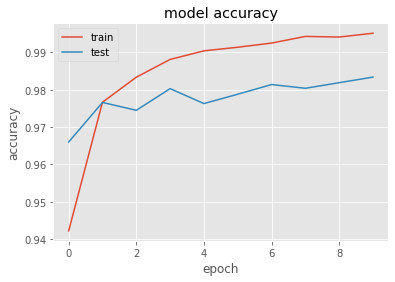

In [192]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# CNN

In [193]:
# Scale value to range 0 to 1 
X_img_train = X_img_train / 255.0
X_img_test = X_img_test / 255.0

In [194]:
X_img_train = X_img_train[:, :, :, np.newaxis]
X_img_train.shape

(60000, 28, 28, 1)

In [195]:
X_img_test = X_img_test[:, :, :, np.newaxis]
X_img_test.shape

(10000, 28, 28, 1)

In [196]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_img_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [197]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)         

In [198]:
history = model.fit(X_img_train, y_train, batch_size=64, epochs=10, validation_data=(X_img_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 121s 2ms/step - loss: 0.1698 - accuracy: 0.9458 - val_loss: 0.0462 - val_accuracy: 0.9852
Epoch 2/10
60000/60000 [==============================] - 122s 2ms/step - loss: 0.0580 - accuracy: 0.9819 - val_loss: 0.0267 - val_accuracy: 0.9918
Epoch 3/10
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0430 - accuracy: 0.9868 - val_loss: 0.0249 - val_accuracy: 0.9911
Epoch 4/10
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0363 - accuracy: 0.9887 - val_loss: 0.0221 - val_accuracy: 0.9921
Epoch 5/10
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0308 - accuracy: 0.9907 - val_loss: 0.0204 - val_accuracy: 0.9935
Epoch 6/10
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0288 - accuracy: 0.9908 - val_loss: 0.0195 - val_accuracy: 0.9934
Epoch 7/10
60000/60000 [==============================] - 126s

In [199]:
score = model.evaluate(X_img_test, y_test, verbose=1)
print('Loss:', score[0], " Accuracy:", score[1])

10000/10000 [==============================] - 5s 479us/step
Loss: 0.022481761758454195  Accuracy: 0.9932000041007996


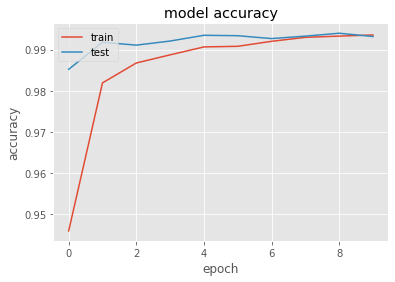

In [200]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()